# Previsione di opportunità di Cross Sell di assicurazioni

In [2]:
# Import libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("./insurance_cross_sell.csv")

In [7]:
df.head()


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [11]:
print(f'size del dataframe : {df.size},\n tipi di variabili :\n {df.dtypes}')

size del dataframe : 4573308,
 tipi di variabili :
 id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [15]:
# Check missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Classi sbilanciate

Il dataset ha un problema di bilanciamento delle classi. Abbiamo infatti nella variabile Response 334399 contro 46710.
Utilizziamo la tecnica Synthetic Minority Oversampling Technique, or SMOTE per risolvere il problema.
Visto che ci sono variabili categoriche utilizziamo l'algoritmo SMOTENC

In [24]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [156]:
X=df.iloc[:,1:-1]
y=df.Response

Convertiamo le variabili in categoriche come richiesto da SMOTENC

In [157]:
X.Gender=X.Gender.astype("category")
X.Driving_License=X.Driving_License.astype("category")
X.Region_Code=X.Region_Code.astype("category")
X.Vehicle_Age=X.Vehicle_Age.astype("category")
X.Vehicle_Damage=X.Vehicle_Damage.astype("category")
X.Previously_Insured=X.Previously_Insured.astype("category")

In [158]:
import imblearn
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features="auto")
X, y = oversample.fit_resample(X, y)

In [159]:
df_balanced=pd.concat([X,y],axis=1)


Applichiamo uno StandarScaler alle variabili numeriche e un OneHotEncoder per le categoriche

In [160]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [161]:

scaler = StandardScaler()
encoder = OneHotEncoder()


In [162]:
category_columns = [col for col in df_balanced.columns if df_balanced[col].dtype.name == 'category']
numeric_columns=[col for col in df_balanced.columns if df_balanced[col].dtype.name!="category"]

numeric_columns.remove("Response")


In [197]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_columns),
        ('cat', encoder, category_columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),("classifier", LogisticRegression(solver='saga', l1_ratio=0.8,max_iter=200,penalty="elasticnet"))])

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model=pipeline.fit(X_train, y_train)
print("model score: %.3f" % pipeline.score(X_test, y_test))


model score: 0.816


/Users/lorenzodemarco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [199]:
from sklearn.metrics import log_loss

In [200]:
y_proba_train=model.predict_proba(X_train)
y_proba_test=model.predict_proba(X_test)

In [201]:
log_loss(y_train,y_proba_train)

0.3892454698186979

In [203]:
log_loss(y_test,y_proba_test)

0.3915288865427318

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [204]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [205]:
cm=confusion_matrix(y_train,y_pred_train)
cm

array([[190957,  76492],
       [ 21430, 246159]])

In [206]:
cm=confusion_matrix(y_test,y_pred_test)
cm

array([[47712, 19238],
       [ 5383, 61427]])

In [215]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score



Precision:0.762
Recall: 0.919
Accuracy: 0.816
F1 score: 0.833


In [216]:

print(f'Precision:{precision_score(y_train,y_pred_train):.3f}')
print(f'Recall: {recall_score(y_train,y_pred_train):.3f}')
print(f'Accuracy: {accuracy_score(y_train,y_pred_train):.3f}')
print(f'F1 score: {f1_score(y_train,y_pred_train):.3f}')

Precision:0.763
Recall: 0.920
Accuracy: 0.817
F1 score: 0.834


In [217]:

print(f'Precision:{precision_score(y_test,y_pred_test):.3f}')
print(f'Recall: {recall_score(y_test,y_pred_test):.3f}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test):.3f}')
print(f'F1 score: {f1_score(y_test,y_pred_test):.3f}')

Precision:0.762
Recall: 0.919
Accuracy: 0.816
F1 score: 0.833


In [223]:
from sklearn.metrics import RocCurveDisplay

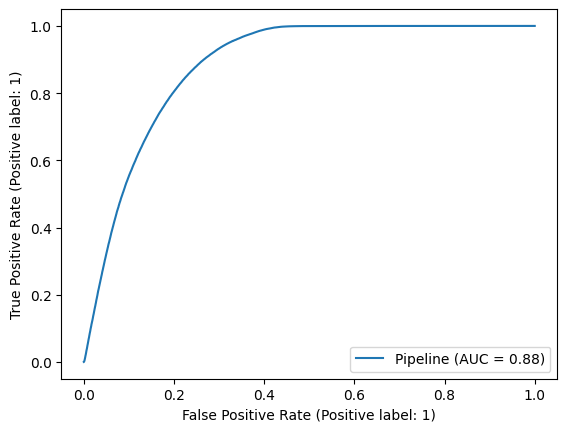

In [225]:
RocCurveDisplay.from_estimator(model,X_train,y_train)

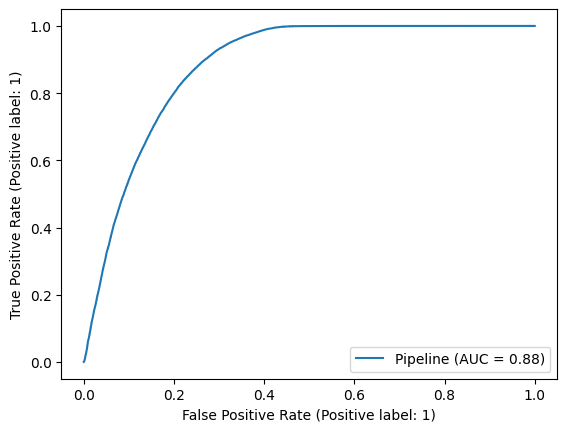

In [226]:
RocCurveDisplay.from_estimator(model,X_test,y_test)